In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

In [101]:
df = pd.read_csv(r"C:\MasterThesis\v1.0\pupil_dataset.csv")
print(df.shape)
df = df.dropna()
print(df.shape)
labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

(180, 901)
(180, 901)


In [102]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [103]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# tworzenie modelu
model = LogisticRegression(max_iter=1000)

In [106]:
# trenowanie modelu
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [107]:
# przewidywanie na danych testowych
predictions = model.predict(X_test)

In [108]:
# sprawdzanie dokładności modelu
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100}%")

Accuracy: 78.57142857142857%


Text(0.5, 1.0, 'CONFUSION MATRIX')

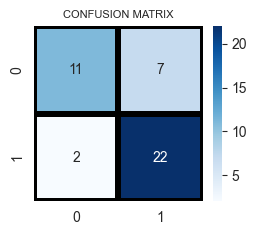

In [109]:
#Confusion matrix
plt.figure(figsize=(6,5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=8)

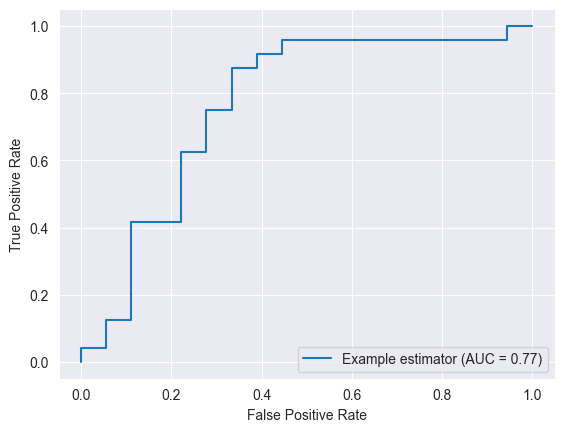

In [110]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
display.plot()
plt.show()